In [13]:
from datasets import load_dataset
dataset = load_dataset("autogluon/chronos_datasets", "m4_weekly")

/Users/aasibipin/aidi-1100/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aasibipin/aidi-1100/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
dataset.keys()

dict_keys(['train'])

In [15]:
df =  dataset['train'].to_pandas()

In [16]:
df

,id,timestamp,target,category
0,T000000,"[1975-08-03T12:00:00.000, 1975-08-10T12:00:00....","[1089.2, 1078.91, 1079.88, 1063.58, 1060.61, 1...",Other
1,T000001,"[1984-04-01T12:00:00.000, 1984-04-08T12:00:00....","[195.928, 194.796, 192.71, 190.288, 188.77, 18...",Other
2,T000002,"[1975-06-01T12:00:00.000, 1975-06-08T12:00:00....","[258.7, 259.8, 260.2, 260.8, 261.1, 263.1, 264...",Other
3,T000003,"[1967-07-02T12:00:00.000, 1967-07-09T12:00:00....","[3460.0, 3340.0, 2770.0, 2520.0, 2740.0, 2760....",Other
4,T000004,"[1986-08-03T12:00:00.000, 1986-08-10T12:00:00....","[4696.0, 4765.0, 4144.0, 3945.0, 4733.0, 4330....",Other
...,...,...,...,...
354,T000354,"[2016-01-03T12:00:00.000, 2016-01-10T12:00:00....","[4798.0, 5192.0, 4194.0, 4217.0, 3926.0, 3987....",Micro
355,T000355,"[2016-01-03T12:00:00.000, 2016-01-10T12:00:00....","[4923.0, 6382.0, 4387.0, 4979.0, 4660.0, 4437....",Micro
356,T000356,"[2016-01-03T12:00:00.000, 2016-01-10T12:00:00....","[4401.0, 4955.0, 3680.0, 4214.0, 4139.0, 3384....",Micro
357,T000357,"[2016-01-03T12:00:00.000, 2016-01-10T12:00:00....","[5977.0, 7770.0, 5843.0, 6169.0, 5990.0, 5537....",Micro


In [17]:
t = df[['timestamp','target']].iloc[0] 

In [19]:
import pandas as pd

In [20]:
# Do not split S
S = pd.DataFrame( t.target, index=t.timestamp)

In [21]:
S.resample('M').sum()

/var/folders/sy/qxbr3q4s7p5cz7hbsw_97fzw0000gn/T/ipykernel_8800/377171987.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  S.resample('M').sum()


,0
1975-08-31,5372.18
1975-09-30,4212.39
1975-10-31,4235.27
1975-11-30,5339.89
1975-12-31,4286.93
...,...
2017-03-31,152781.04
2017-04-30,185387.38
2017-05-31,143260.48
2017-06-30,145203.74


In [22]:
S['id'] = list(range(len(S)))

In [23]:
S = S.reset_index()

In [24]:
from tsfresh.feature_extraction import MinimalFCParameters

MinimalFCParameters()


{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [25]:
features =  MinimalFCParameters()


In [26]:
# add additional features if needed: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html
additional = {
    'kurtosis':None}
features.update(additional)

In [27]:
features

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None, 'kurtosis': None}

In [28]:

# This is taking features for all of time 
# You should filter to the last N days and then do extract_features
from tsfresh import extract_features

for time_range in [30, 60, 180, ]:
    filtered_time_series = S.iloc[time_range]
    extract_features(S, column_id="id", column_sort="index", default_fc_parameters=features)


Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.82it/s]


In [30]:
extract_features(S, column_id="id", column_sort="index", default_fc_parameters=features)

Feature Extraction: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.63it/s]


,0__sum_values,0__median,0__mean,0__length,0__standard_deviation,0__variance,0__root_mean_square,0__maximum,0__absolute_maximum,0__minimum,0__kurtosis
0,1089.20,1089.20,1089.20,1.0,0.0,0.0,1089.20,1089.20,1089.20,1089.20,NaN
1,1078.91,1078.91,1078.91,1.0,0.0,0.0,1078.91,1078.91,1078.91,1078.91,NaN
2,1079.88,1079.88,1079.88,1.0,0.0,0.0,1079.88,1079.88,1079.88,1079.88,NaN
3,1063.58,1063.58,1063.58,1.0,0.0,0.0,1063.58,1063.58,1063.58,1063.58,NaN
4,1060.61,1060.61,1060.61,1.0,0.0,0.0,1060.61,1060.61,1060.61,1060.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2187,36150.20,36150.20,36150.20,1.0,0.0,0.0,36150.20,36150.20,36150.20,36150.20,NaN
2188,35790.55,35790.55,35790.55,1.0,0.0,0.0,35790.55,35790.55,35790.55,35790.55,NaN
2189,35790.55,35790.55,35790.55,1.0,0.0,0.0,35790.55,35790.55,35790.55,35790.55,NaN
2190,34066.95,34066.95,34066.95,1.0,0.0,0.0,34066.95,34066.95,34066.95,34066.95,NaN


<Axes: >

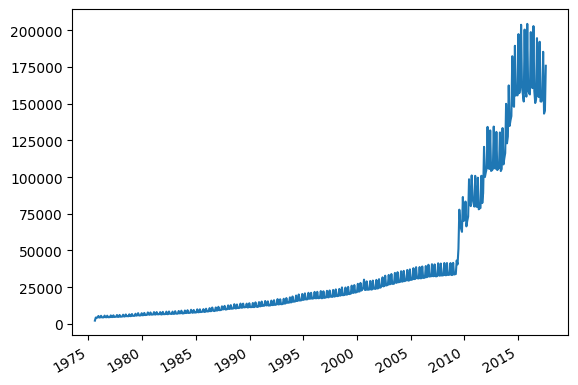

In [83]:
# Rolling average instead of this
S.resample('30D', origin='end').sum().plot()